<a href="https://colab.research.google.com/github/SambhavDjain/Ml_Projects/blob/main/Customer_Churn_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the Dependencies

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


###Data Loading and Understanding


In [113]:
#load the csv data to pandas dataframe
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [114]:
df.shape

(7043, 21)

In [115]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


####Show all columns in the table

In [116]:
pd.set_option("display.max_columns",None)

In [117]:
df.info() #There are many which are given object but are float so we have to change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [118]:


#dropping the coustomerid column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [119]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [120]:
print(df["gender"].unique())

['Female' 'Male']


In [121]:
print(df["SeniorCitizen"].unique())

[0 1]


In [122]:
#printing the unique values  in all columns
for col in df.columns:
  print(col,df[col].unique())
  print(""*50)

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService ['No' 'Yes']

MultipleLines ['No phone service' 'No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['No' 'Yes' 'No internet service']

StreamingTV ['No' 'Yes' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalChar

In [123]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [124]:

df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [125]:
len(df[df["TotalCharges"]==" "])

11

#On replacing thee {" "} by 0.0

In [126]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

##On converting the datatype of the column

In [127]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [128]:
#To check whether its datatype chanegs
df.info() #The totalcharges change from obj to float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [129]:
#on checking the class distribution of target column
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


###**Insights**
1. Customer Id(Removed as it is not required for modelling)
2. No missing values in the datasets
3. Missing values in totallcharges column were replaces by 0
4. class imbalance identified in target (Churn)

###EDA (Exploratory Data Analysis)


In [130]:
df.shape

(7043, 20)

In [131]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [132]:

df.describe() #This show only which are having the integr type

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


##Numerical features - Analysis

Understanding the distribution of the numerical features

In [133]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(10,7))
  plt.title(f"Distribution of {column_name}")
  sns.histplot(df[column_name],kde=True)#kernel density estimate-visualizing the distribution of observations in a dataset, analogous to a histogram

  #Calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #Add vertical lines for mean and median
  plt.axvline(col_mean,color="red",linestyle="--",label = "Mean")
  plt.axvline(col_median,color="green",linestyle="--",label="Median" )

  plt.legend()

  plt.show()

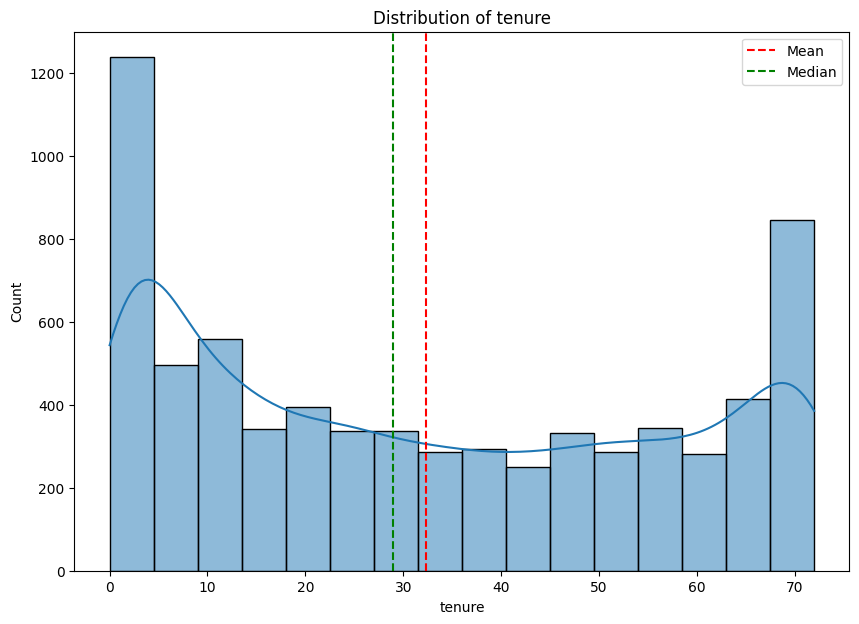

In [134]:
plot_histogram(df,"tenure")

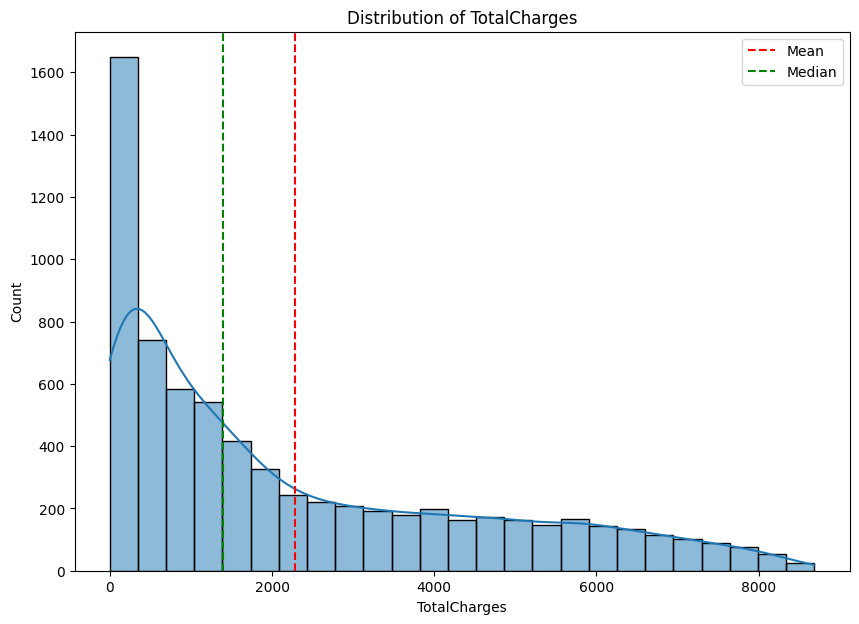

In [135]:

plot_histogram(df,"TotalCharges")

###Box Plot for numerical features

In [136]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(10,7))
  sns.boxplot(df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()


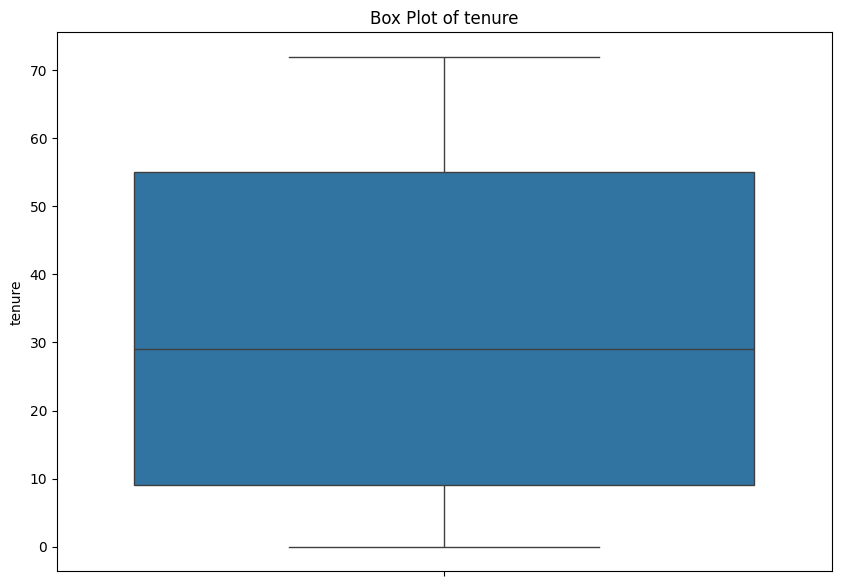

In [137]:
plot_boxplot(df,"tenure")

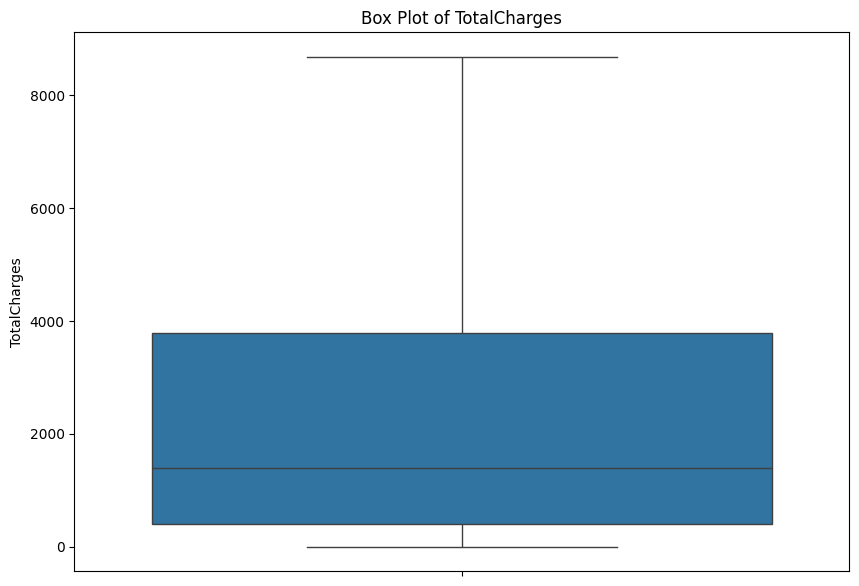

In [138]:
plot_boxplot(df,"TotalCharges")

###Corelation matrix - Heatmap


down side-
1. corr() - correlation matrix between selected columns
2. annot=True - 	Displays the correlation values on each cell.
3. cmap="coolwarm"- 	Uses a diverging colormap (blue = negative, red = positive correlation).
4. fmt=".2f"	Limits displayed correlation values to 2 decimal places.

<Axes: >

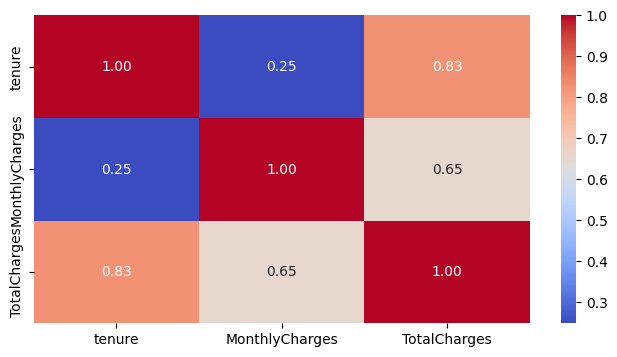

In [139]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap ="coolwarm",fmt = ".2f")

#Categorical feature- Analysis

In [140]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Counterplot for categorical columns

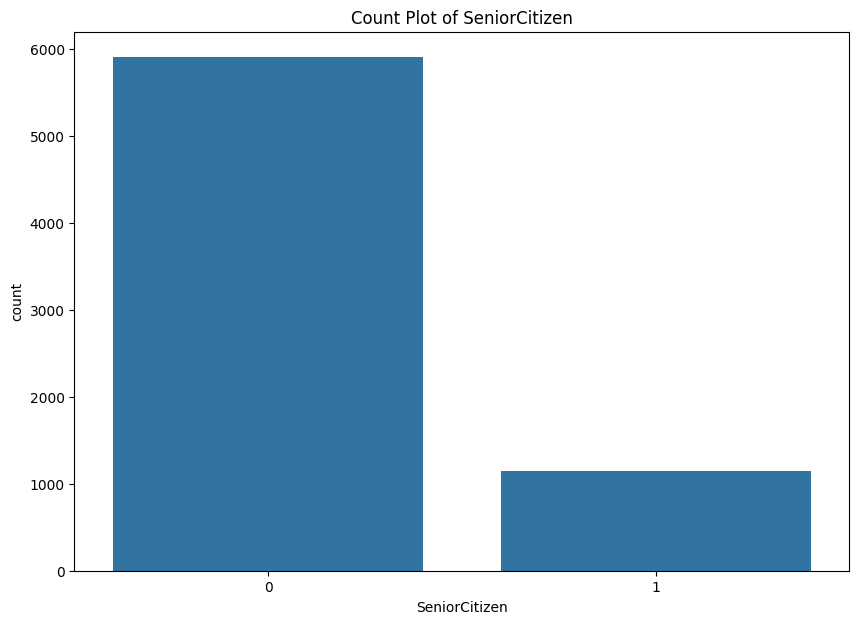

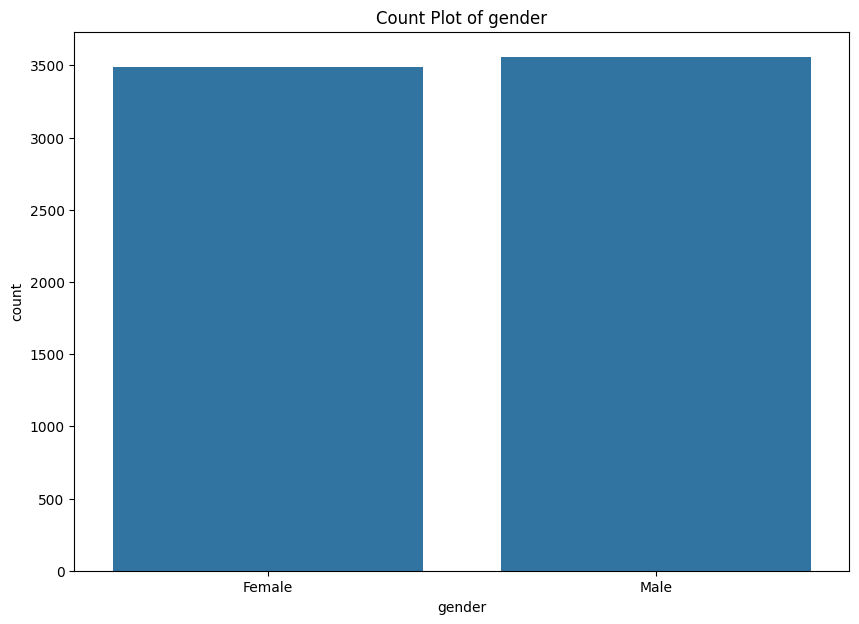

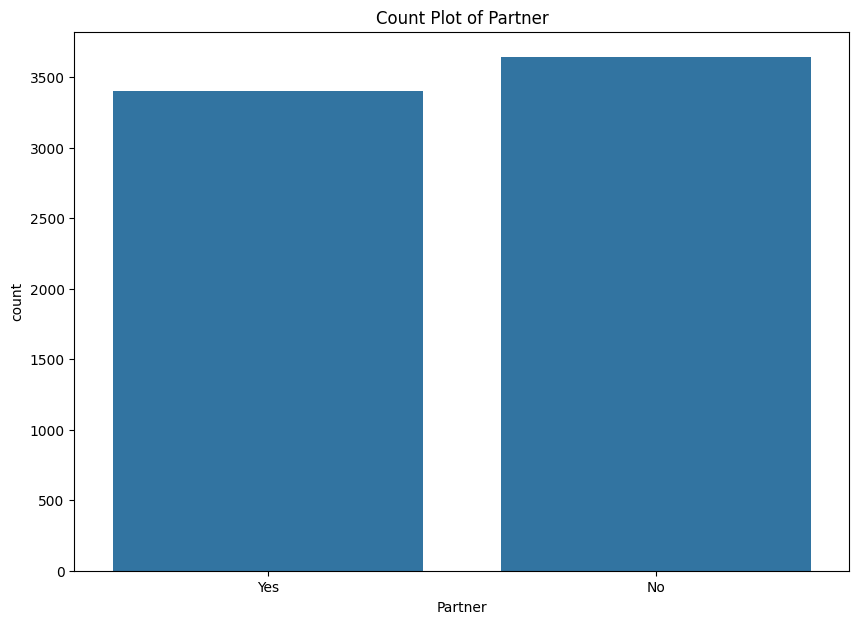

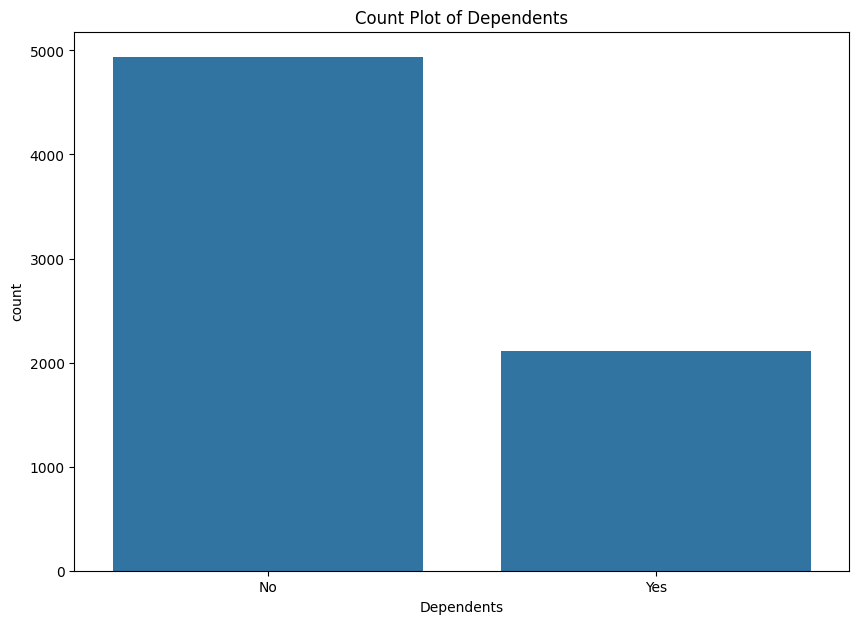

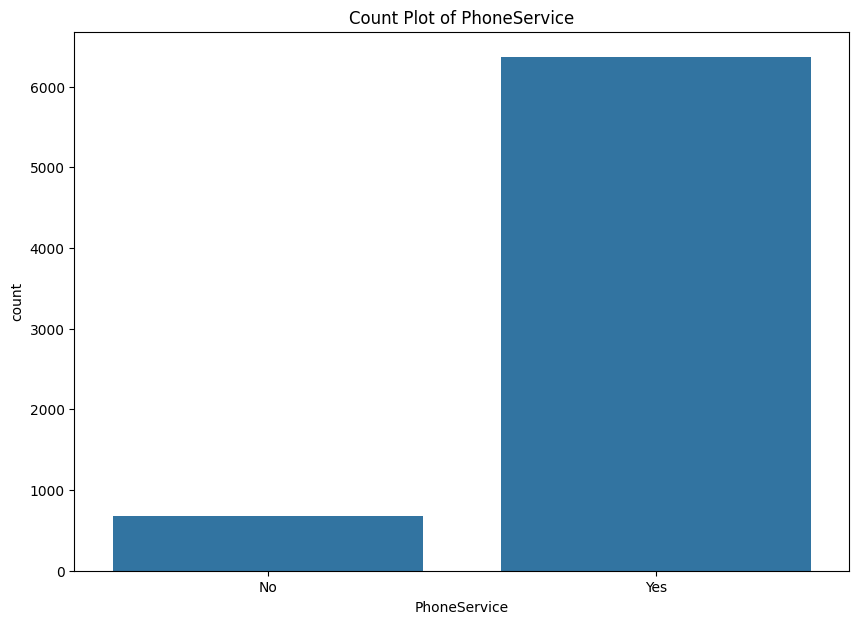

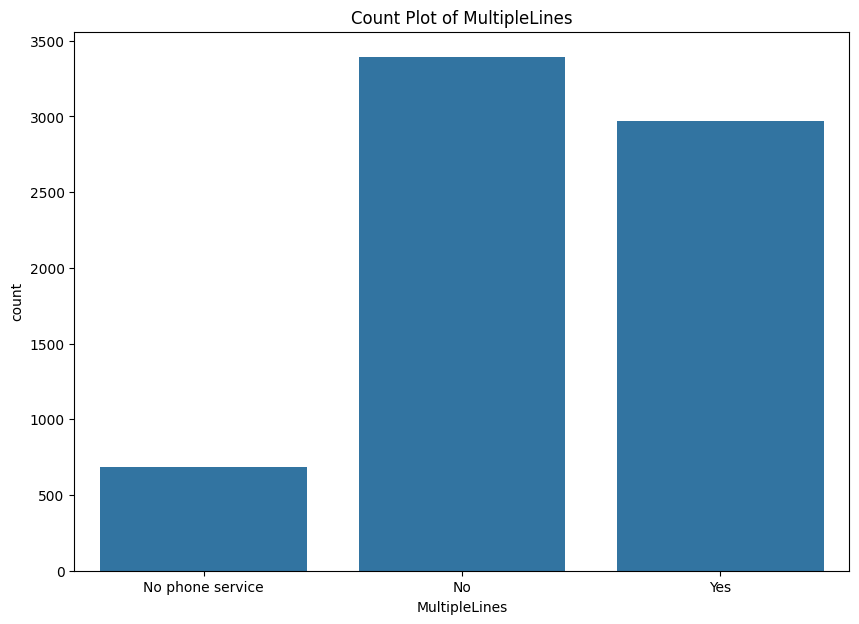

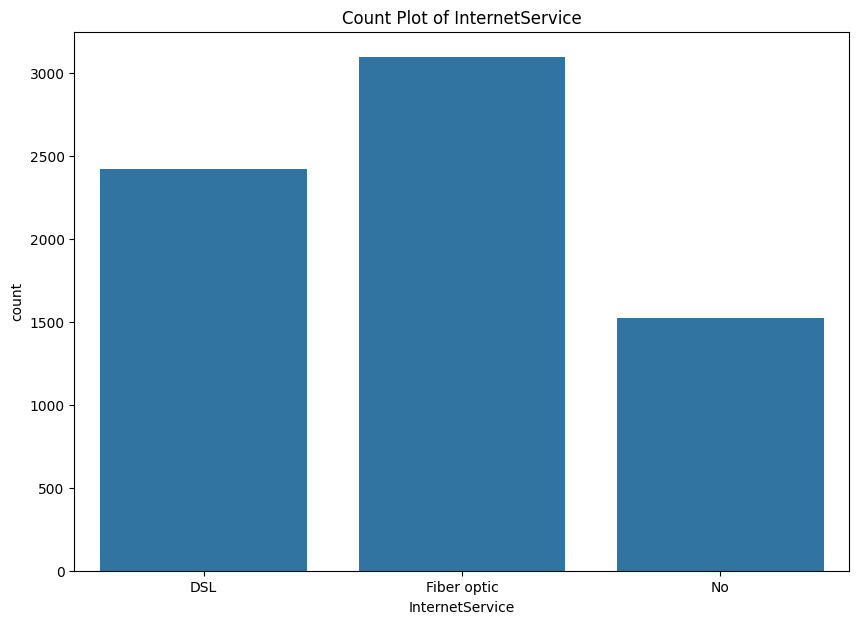

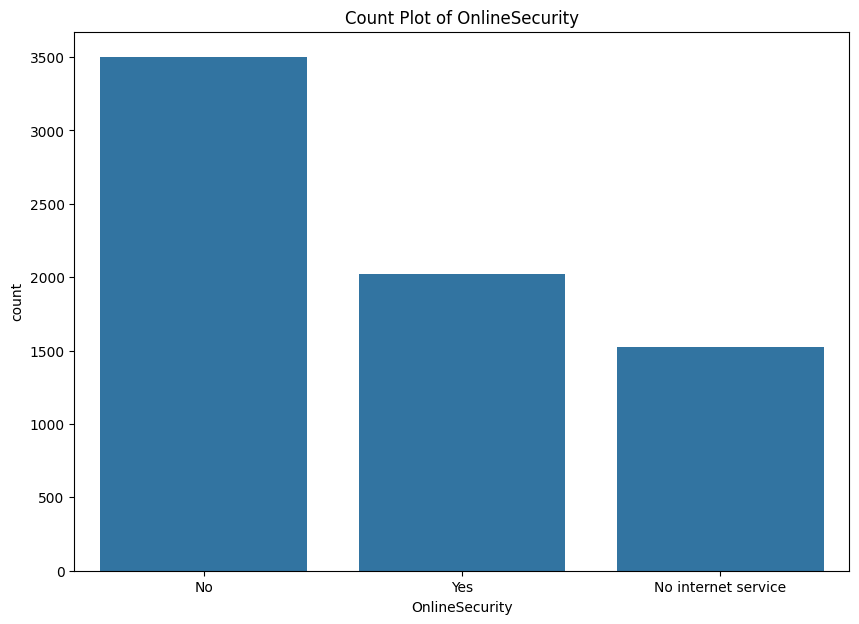

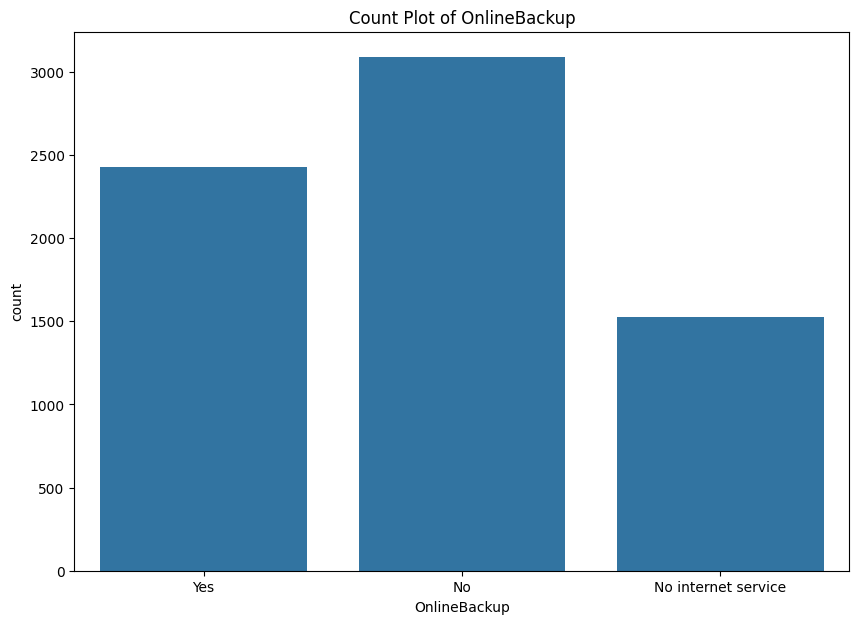

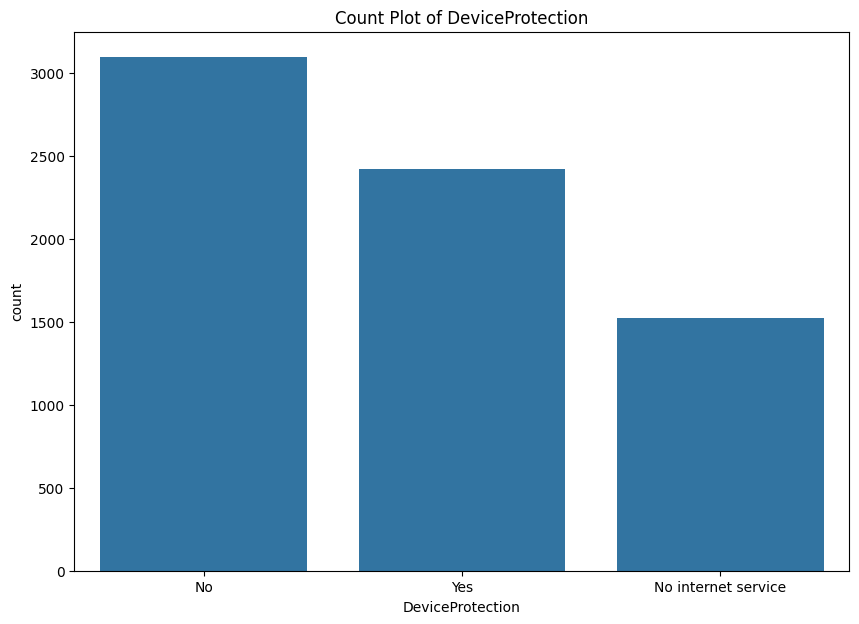

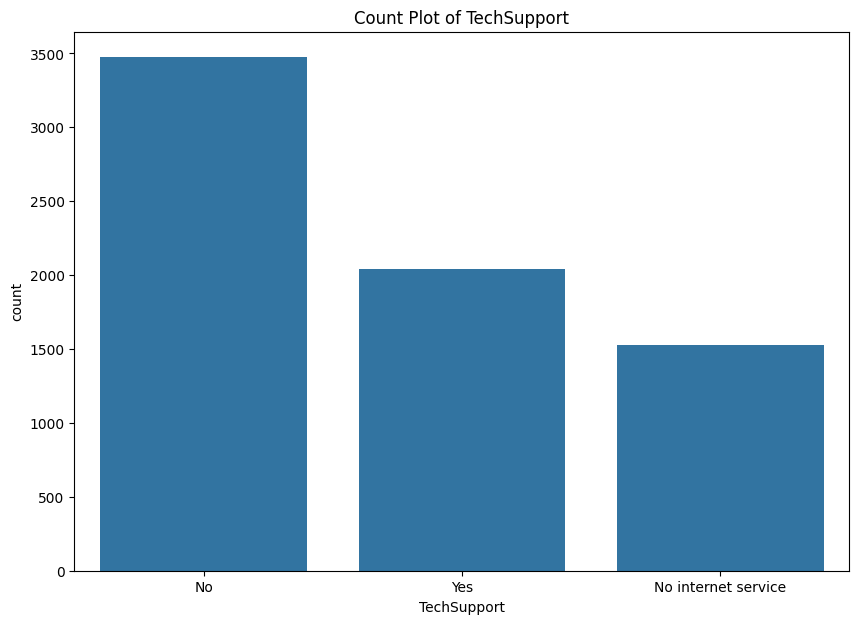

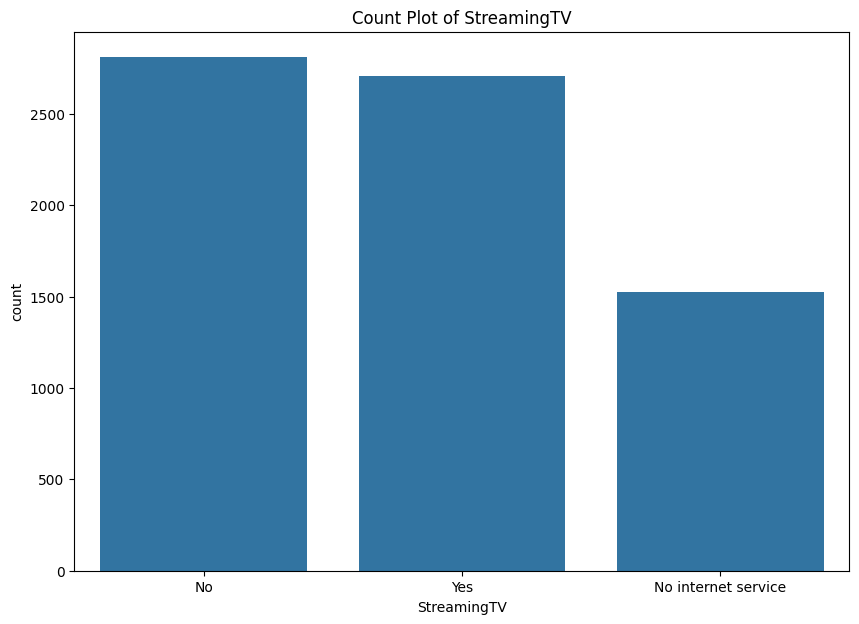

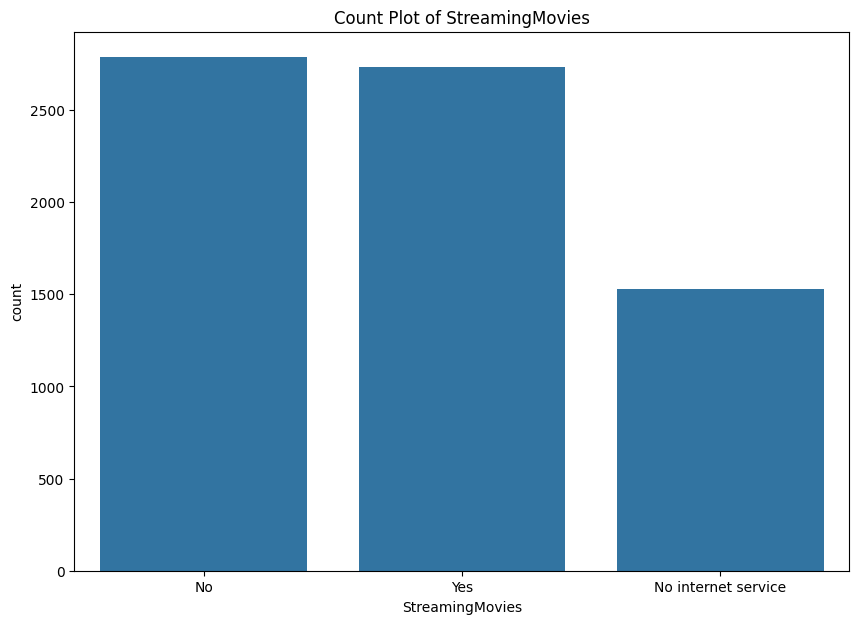

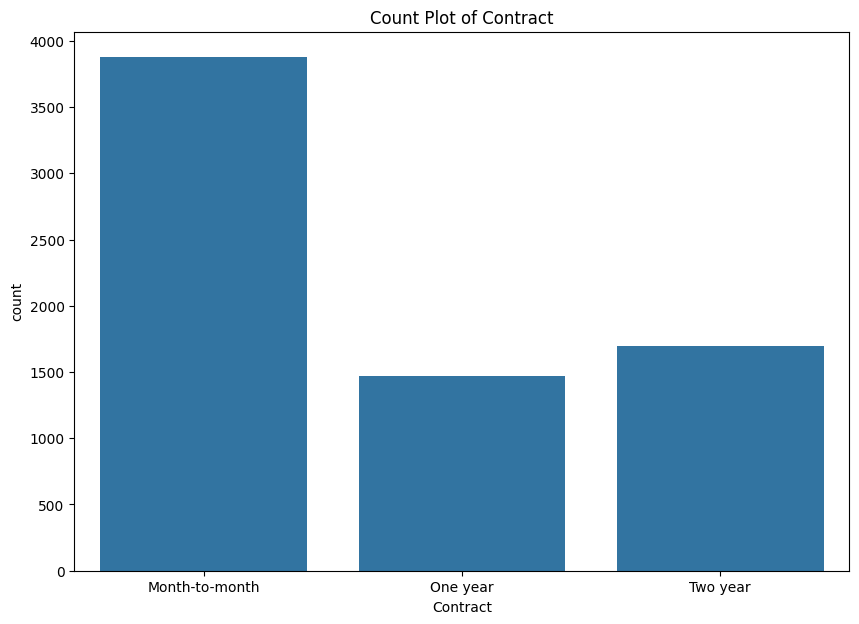

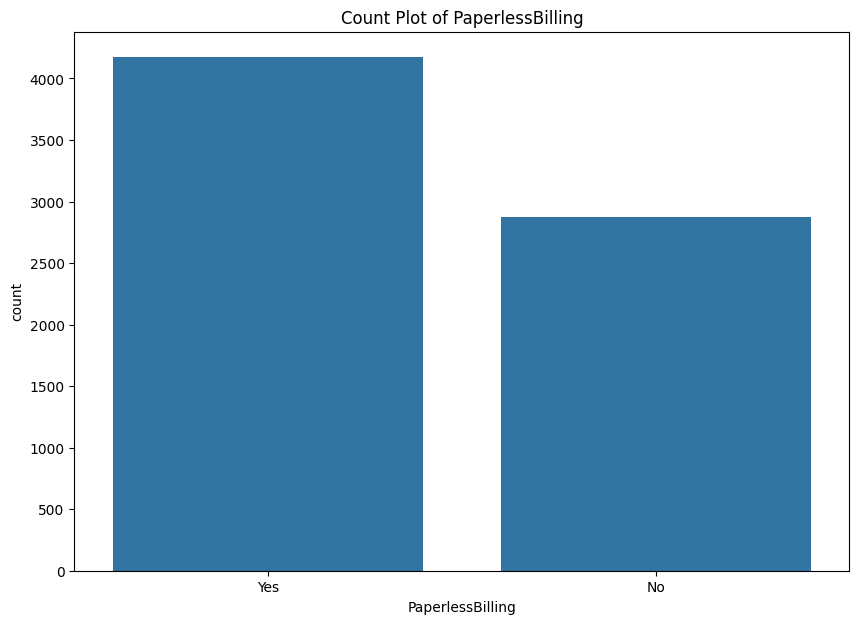

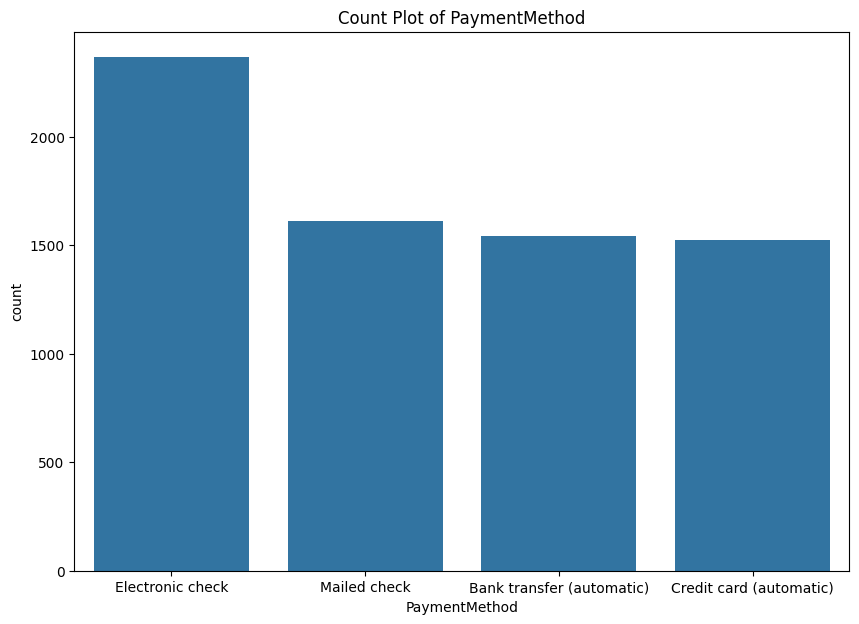

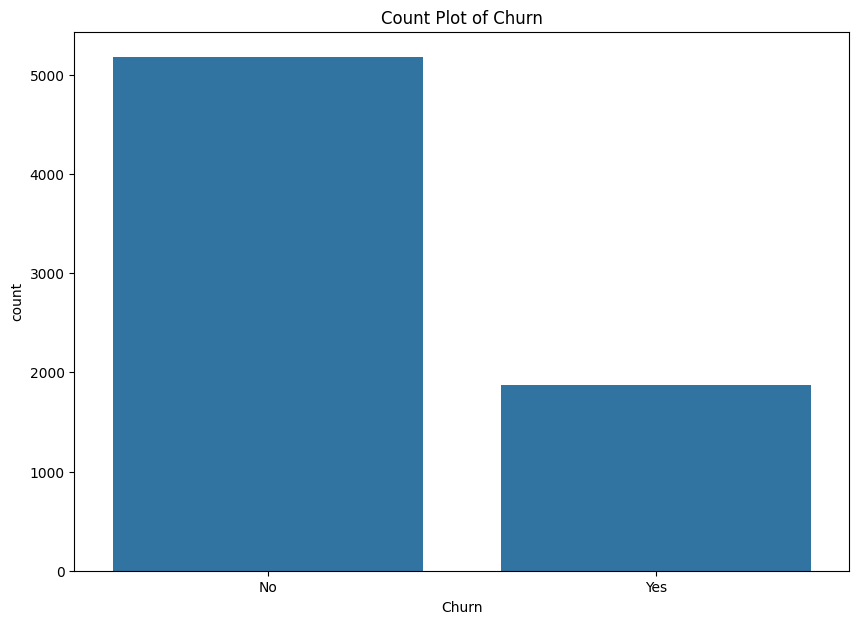

In [142]:
object_cols = df.select_dtypes(include="object").columns.tolist()
object_cols = ["SeniorCitizen"]+ object_cols

for col in object_cols:
  plt.figure(figsize=(10,7))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

#Data Preprocessing

In [143]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#Label encoding of target column
On converting the churn into 0,1

In [144]:
df["Churn"] = df["Churn"].replace({"Yes": 1 , "No": 0})

In [145]:

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [146]:
#to check how amny count are of 0,1 in Churn
df["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


#Label encoding of categorical Features

In [147]:
#On Identifying the columns with object data types
object_columns = df.select_dtypes(include ="object").columns

object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [148]:
#Initialize a dictionary to save the encoders
encoders = {}

#Apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

In [149]:
#Save the encoder to pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [150]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [151]:
#All the values has chnaged from categorical to numerical

In [152]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


##On splitting into Training and Testing Data

In [153]:
#splitting the features and labels
X = df.drop(columns =["Churn"])
y = df["Churn"]

In [154]:
#split training and testinf data
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#SMOTE (Synthetic Minority Over-sampling Technique)
A popular technique to handle class imbalance in classification problems

In [155]:
#This only works in training data

smote =  SMOTE(random_state = 42)


In [156]:
#Turning the normal data into smote
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [157]:
y_train.shape

(5634,)

In [158]:
#y_train_smote is the target column (Churn = 0 or 1)
#In this we're seeing  How many samples are there in each class after SMOTE
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


In [159]:
#Not used x_train_smote becoz Because X_train_smote is a DataFrame with multiple columns

##**Model Training**

In [160]:
#Training with a default hyperparameters
#dictionary of models:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XgBoost": XGBClassifier(random_state=42)}

In [161]:
#Dictionary to store the cross validation results
cv_scores ={}

#perform 5 fold cross validation for each model

for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-validation accuracy : {np.mean(scores): .2f}")

Training Decision Tree with default parameters
Decision Tree Cross-validation accuracy :  0.78
Training Random Forest with default parameters
Random Forest Cross-validation accuracy :  0.84
Training XgBoost with default parameters
XgBoost Cross-validation accuracy :  0.83


In [162]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XgBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

 RandomForestClassifier givees highest accuracy

In [163]:
rfc = RandomForestClassifier(random_state=42)


In [164]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [165]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


In [166]:
y_train.value_counts(),y_train_smote.value_counts()

(Churn
 0    4138
 1    1496
 Name: count, dtype: int64,
 Churn
 0    4138
 1    4138
 Name: count, dtype: int64)

##Model Evaluation

In [169]:
#evalute on test data

y_test_pred = rfc.predict(X_test)

print("Accuracy score : \n", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test,y_test_pred))
print("Classification Report : \n", classification_report(y_test,y_test_pred))

Accuracy score : 
 0.7785663591199432
Confusion Matrix : 
 [[878 158]
 [154 219]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [170]:
#Save the trained model as pickle file
model_data = {"model": rfc,"features_names"   : X.columns.tolist()}


with open("Coustomer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)



#Load and save the model


In [171]:
#load and save teh model and feature names
with open ("Coustomer_churn_model.pkl","rb") as f:
  model_data = pickle.load(f)


loaded_model = model_data["model"]
features_names = model_data["features_names"]


In [172]:
loaded_model

RandomForestClassifier(random_state=42)

In [173]:
features_names


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [179]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85,
}

input_data_df = pd.DataFrame([input_data])
with open("encoders.pkl","rb") as f:
  encoders = pickle.load(f)

#Encode categorical features using the saved encodrs

for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])


#make predictions
prediction  = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)
print(prediction)


#results
print(f"Prediction : {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability : {pred_prob}")

[0]
Prediction : No Churn
Prediction Probability : [[0.78 0.22]]


In [ ]:
input_data_df.head(3)